## Régression Linéaire Multiple

Maintenant vous savez comment construire un modèle avec un X (variable caractéristique) et Y (variable réponse). Mais que se passe-t-il si vous avez trois variables caractéristiques, ou peut-être 10 ou 100 ? Construire un modèle séparé pour chacune d'elles, les combiner, puis les comprendre serait une tâche très difficile et quasi impossible. En utilisant la régression linéaire multiple, vous pouvez construire des modèles entre une variable réponse et de nombreuses variables caractéristiques.

Voyons comment faire cela.

### Étape 1 : Importation et Compréhension des Données

In [3]:
import pandas as pd

In [95]:
# Importing advertising.csv
advertising_multi = pd.read_csv('advertising_MLR.csv')

In [97]:
# Regarder les cinq premières lignes
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [92]:
# Regarder les cinq dernières lignes
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [11]:
# Quel type de valeurs sont stockées dans les colonnes ?
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Examinons quelques informations statistiques sur notre dataframe.
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Étape 2 : Visualisation des Données

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

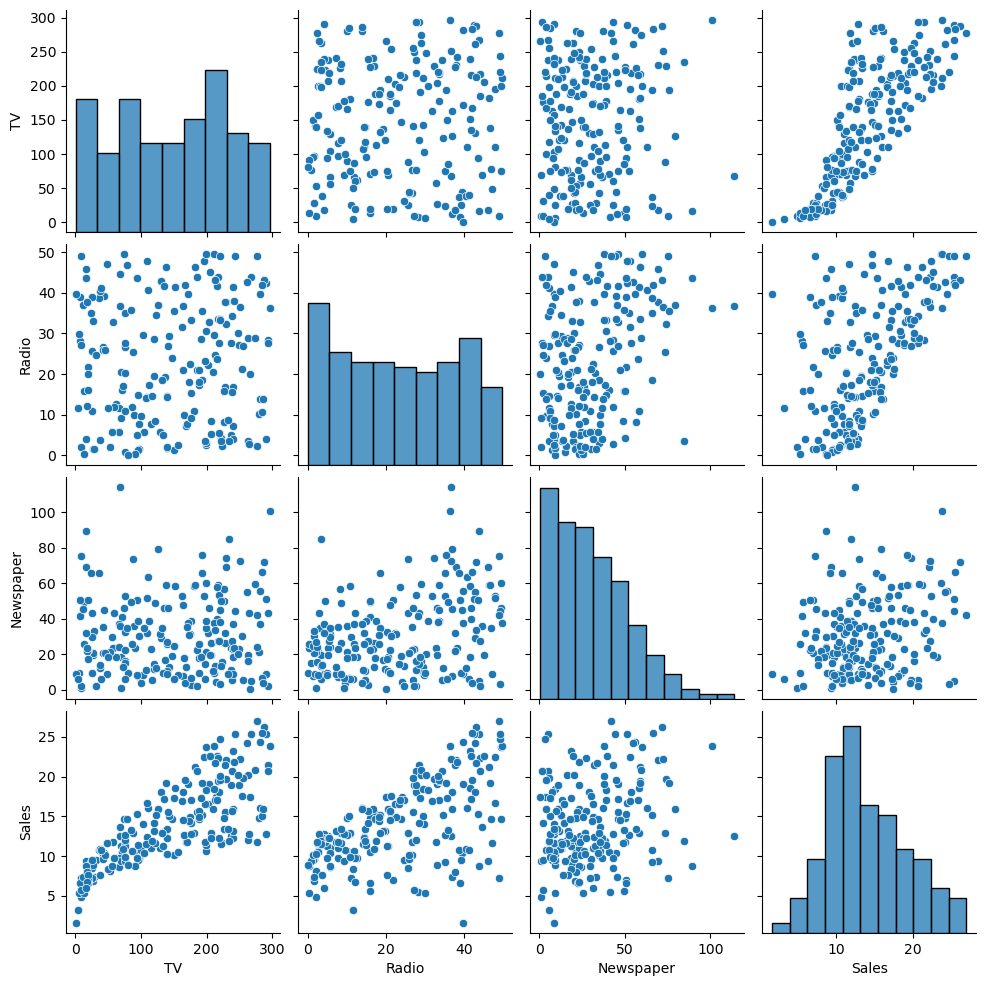

In [18]:
# Traçons un pair plot de toutes les variables de notre dataframe
sns.pairplot(advertising_multi)
plt.show()

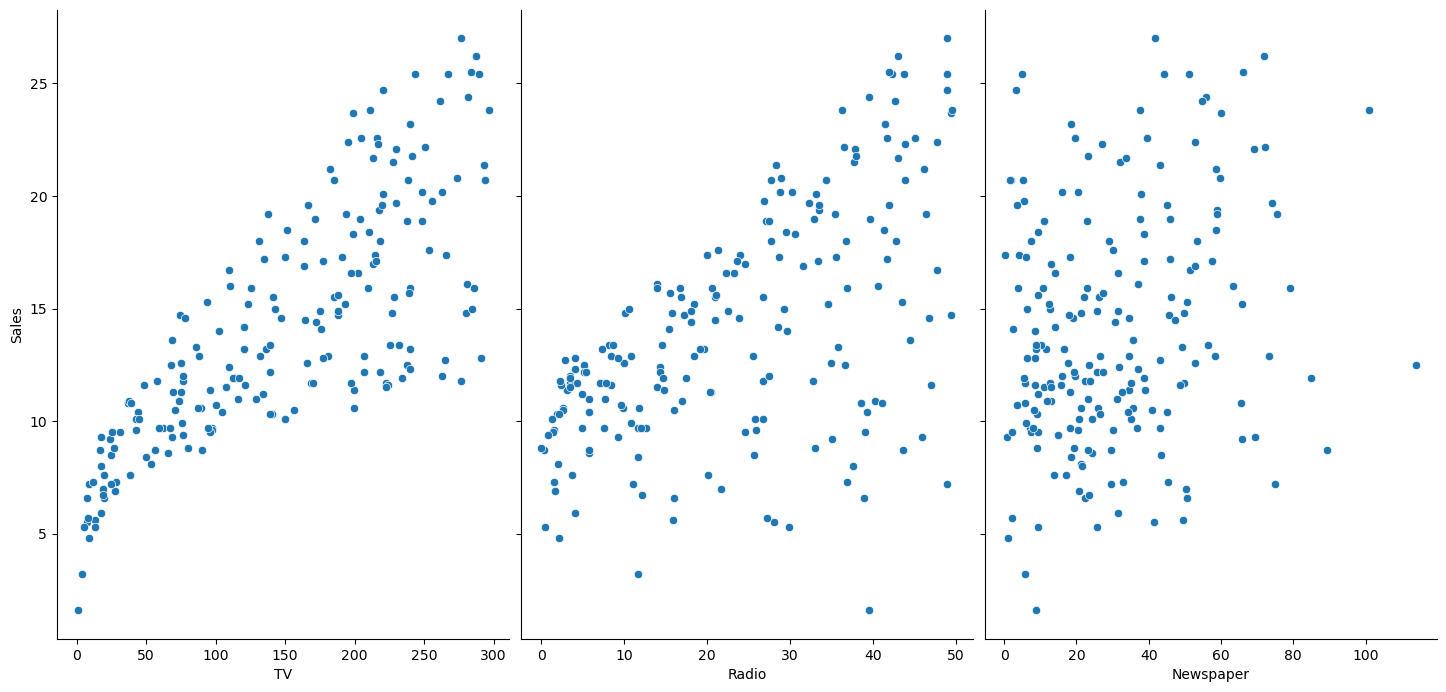

In [20]:
# Visualiser la relation entre les caractéristiques et la réponse en utilisant des nuages de points
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=7, aspect=0.7, kind='scatter')
plt.show()

### Étape 3 : Division des Données pour l'Entraînement et le Test

In [25]:
# Mettre les variables caractéristiques dans X
X = advertising_multi[['TV','Radio','Newspaper']]

# Mettre la variable réponse dans y
y = advertising_multi['Sales']

In [27]:
# random_state est la graine utilisée par le générateur de nombres aléatoires. Elle peut être n'importe quel entier.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

### Étape 4 : Exécution de la Régression Linéaire

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
# Représenter LinearRegression comme lr (Créer un objet LinearRegression)
lm = LinearRegression()

In [36]:
# Ajuster le modèle aux données d'entraînement
lm.fit(X_train,y_train)

LinearRegression()

### Étape 5 : Évaluation du Modèle

In [39]:
# Afficher l'ordonnée à l'origine
print(lm.intercept_)

2.652789668879496


In [41]:
# Afficher les coefficients pour chaque variable caractéristique
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


D'après le résultat ci-dessus, nous pouvons déduire que si le budget TV augmente de 1 unité, cela affectera les ventes de 0,045 unité.

### Étape 6 : Prédictions

In [45]:
# Faire des prédictions en utilisant le modèle
y_pred = lm.predict(X_test)

### Étape 7 : Calcul des Termes d'Erreur

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [50]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636976
r_square_value : 0.9058622107532245


### Étape Optionnelle : Vérification des P-values avec STATSMODELS

In [53]:
import statsmodels.api as sm

X_train_sm = X_train
# Contrairement à SKLearn, statsmodels n'ajuste pas automatiquement une constante,
# donc vous devez utiliser la méthode sm.add_constant(X) pour ajouter une constante.
X_train_sm = sm.add_constant(X_train_sm)

# créer un modèle ajusté en une ligne
lm_1 = sm.OLS(y_train, X_train_sm).fit()

# afficher les coefficients
print(lm_1.params)

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64


In [55]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           9.97e-66
Time:                        19:14:31   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [57]:
2.6528/0.384

6.908333333333333

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

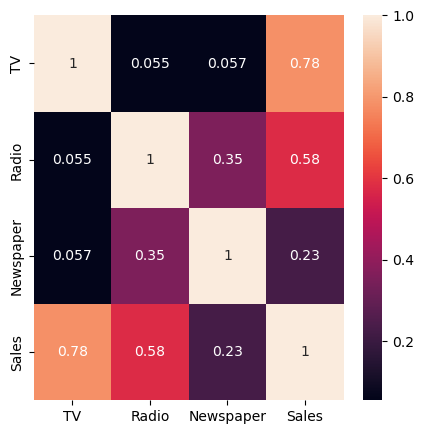

In [61]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)
plt.show()

### Étape 8 : Implémentation des Résultats et Ré-exécution du Modèle
D'après les données ci-dessus, vous pouvez conclure que **Newspaper est non significatif**.


In [65]:
# Supprimer Newspaper de notre dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [67]:
# Construction du modèle
lm.fit(X_train_new,y_train)

LinearRegression()

In [69]:
# Faire des prédictions
y_pred_new = lm.predict(X_test_new)

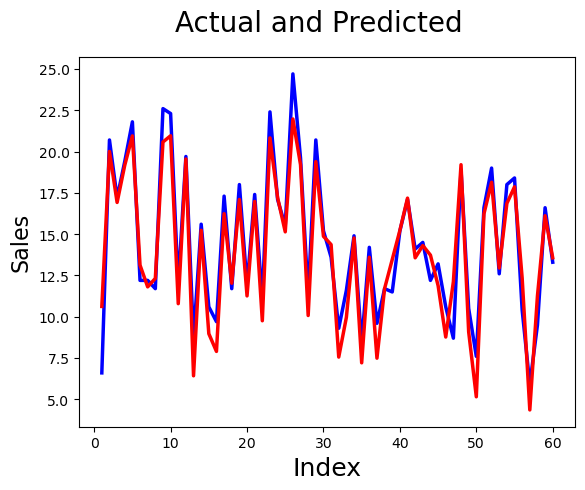

In [71]:
# Réel vs Prédit
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label
plt.show()

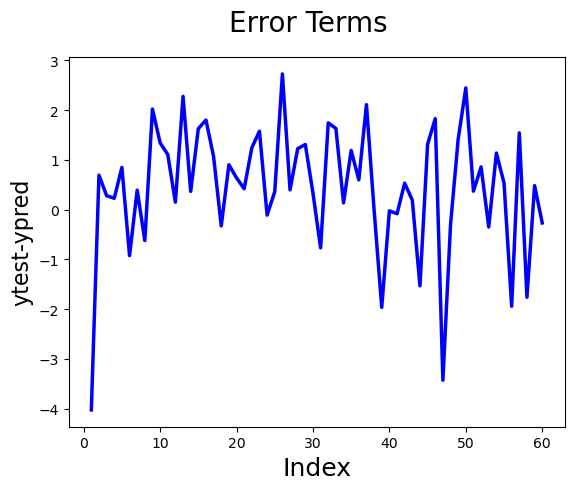

In [73]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [77]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.7847400520902803
r_square_value : 0.909216449171822


In [79]:
X_train_final = X_train_new
# Contrairement à SKLearn, statsmodels n'ajuste pas automatiquement une constante,
# donc vous devez utiliser la méthode sm.add_constant(X) pour ajouter une constante.
X_train_final = sm.add_constant(X_train_final)
# créer un modèle ajusté en une ligne
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           4.46e-67
Time:                        19:16:39   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Régression Linéaire Simple : Newspaper(X) et Sales(y)


In [90]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

# Required only in the case of simple linear regression
X_train = X_train.values[:,np.newaxis]
X_test = X_test.values[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657
